**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region, "summary")
txt_fname  = "result.coverage.zscore.final.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_score = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 432505      9


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [3]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(FD_RES, "region_annotation", txt_region, "summary")
txt_fname  = "region.annotation.fcc_mpra_agarwal2023.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 61736    10


Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Group,Label,Region_Annot,Region_Count
chr1,115429,115969,chr1:115429-115969,fcc_astarr_macs_input_overlap,fcc_mpra_agarwal2023,Agarwal2023,potential enhancer,chr1:115631-115831,1
chr1,138321,139517,chr1:138321-139517,fcc_astarr_macs_input_overlap,fcc_mpra_agarwal2023,Agarwal2023,potential enhancer,chr1:138940-139140;chr1:138940-139140,2
chr1,267910,268557,chr1:267910-268557,fcc_astarr_macs_input_overlap,fcc_mpra_agarwal2023,Agarwal2023,potential enhancer,chr1:267911-268111;chr1:267911-268111,2


## Arrange table

In [6]:
dat = dplyr::left_join(
    dat_region_annot,
    dat_region_score,
    by = c("Chrom", "ChromStart", "ChromEnd", "Region"),
    relationship = "many-to-many"
)

dat_region_merge = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 236859     15


Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Group,Label,Region_Annot,Region_Count,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr1,115429,115969,chr1:115429-115969,fcc_astarr_macs_input_overlap,fcc_mpra_agarwal2023,Agarwal2023,potential enhancer,chr1:115631-115831,1,0.1663485,MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA,Lenti-MPRA
chr1,115429,115969,chr1:115429-115969,fcc_astarr_macs_input_overlap,fcc_mpra_agarwal2023,Agarwal2023,potential enhancer,chr1:115631-115831,1,1.8950463,STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR
chr1,138321,139517,chr1:138321-139517,fcc_astarr_macs_input_overlap,fcc_mpra_agarwal2023,Agarwal2023,potential enhancer,chr1:138940-139140;chr1:138940-139140,2,-0.5919640,MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA,Lenti-MPRA


In [13]:
dat = dat_region_merge
vec = c("promoter", "potential enhancer")

dat = dat %>% 
    dplyr::select(Region, Group, Label, Score, Assay_Label) %>%
    dplyr::filter(Label %in% vec) %>%
    dplyr::distinct()

dat_region_merge_arrange = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 234441      5


Region,Group,Label,Score,Assay_Label
chr1:115429-115969,Agarwal2023,potential enhancer,0.1663485,Lenti-MPRA
chr1:115429-115969,Agarwal2023,potential enhancer,1.8950463,ATAC-STARR
chr1:138321-139517,Agarwal2023,potential enhancer,-0.5919640,Lenti-MPRA


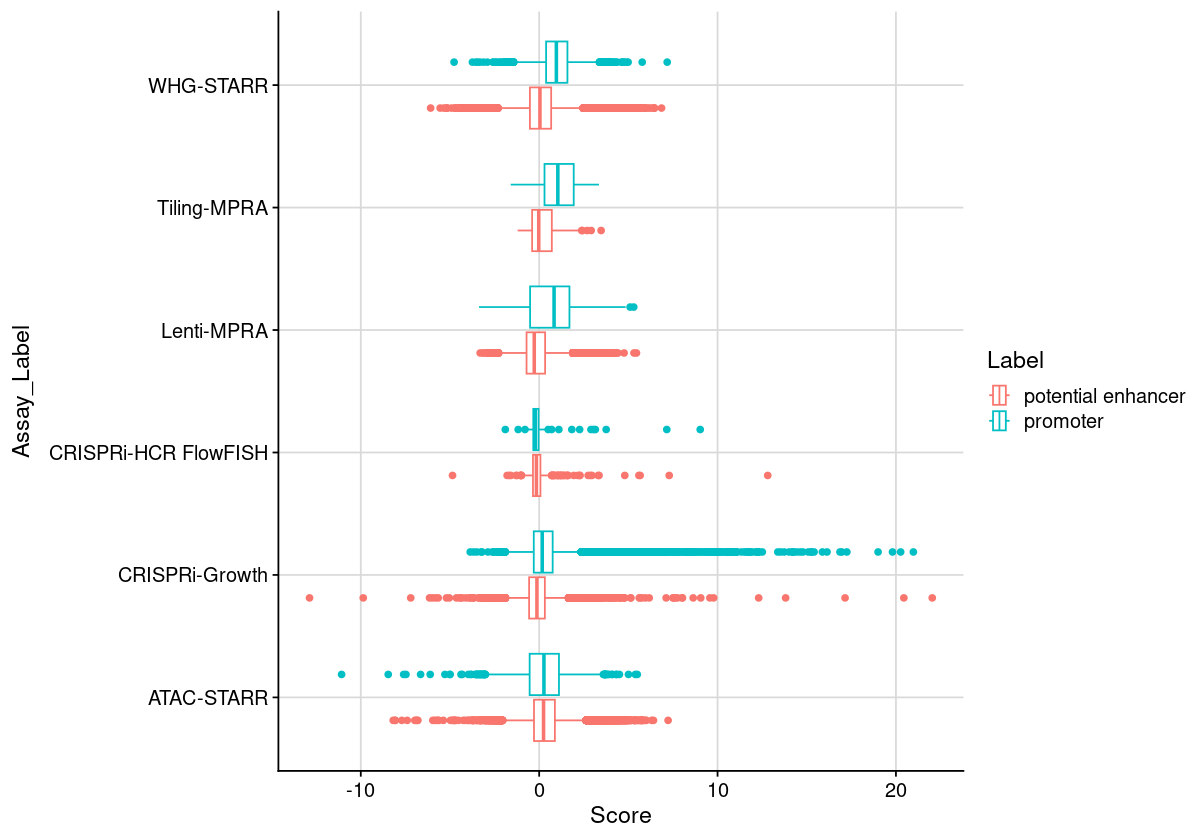

In [16]:
dat = dat_region_merge_arrange
gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Label)) +
    geom_boxplot() +
    theme_cowplot() +
    background_grid()

options(repr.plot.width=10, repr.plot.height=7)
print(gpt)

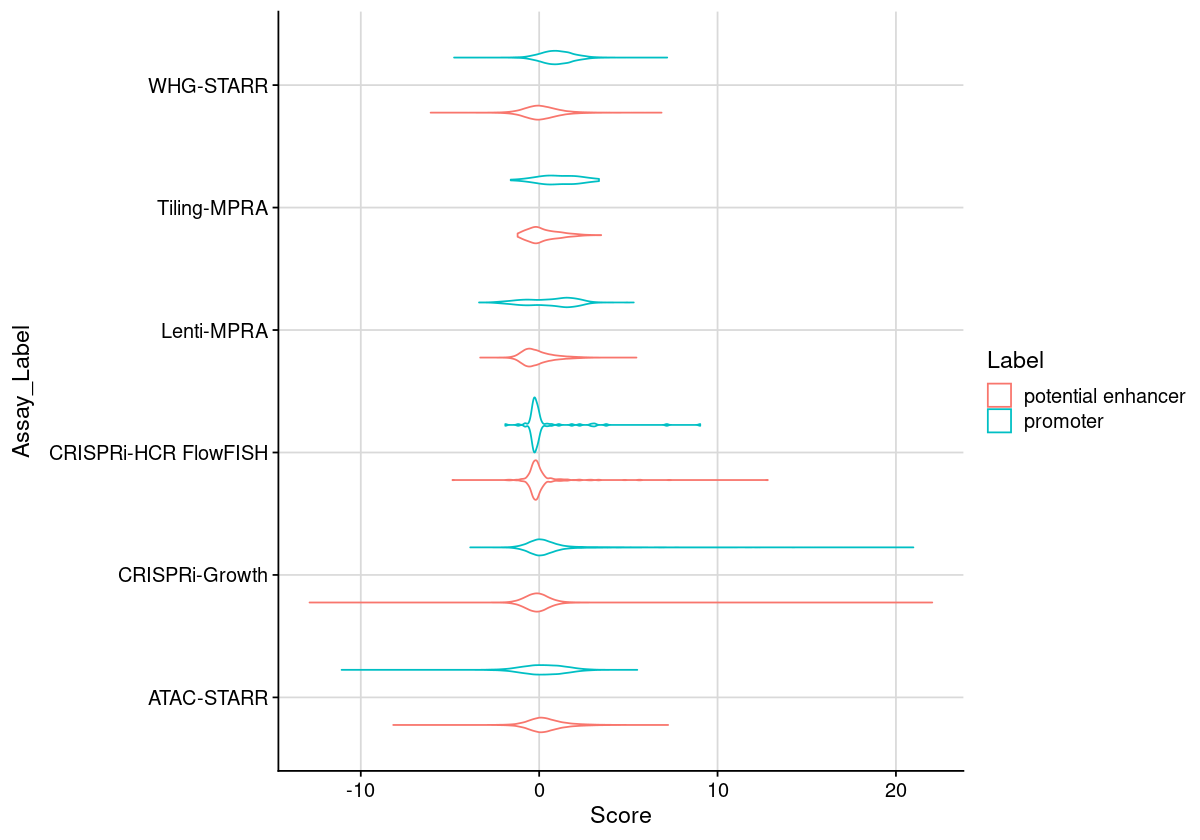

In [17]:
dat = dat_region_merge_arrange
gpt = ggplot(dat, aes(x=Score, y=Assay_Label, color=Label)) +
    geom_violin() +
    theme_cowplot() +
    background_grid()

options(repr.plot.width=10, repr.plot.height=7)
print(gpt)